<a href="https://colab.research.google.com/github/Faligithub/IIIT-ihub/blob/main/AIML_Module_4_Lab_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [ ]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

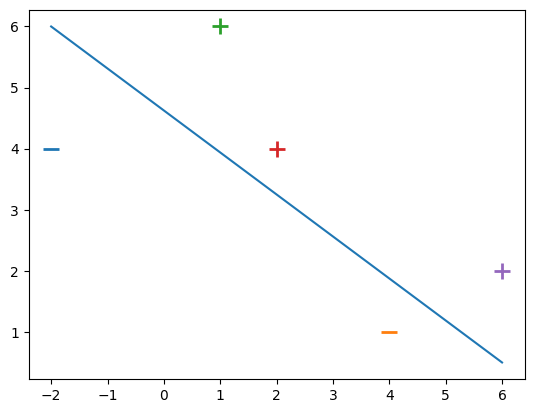

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

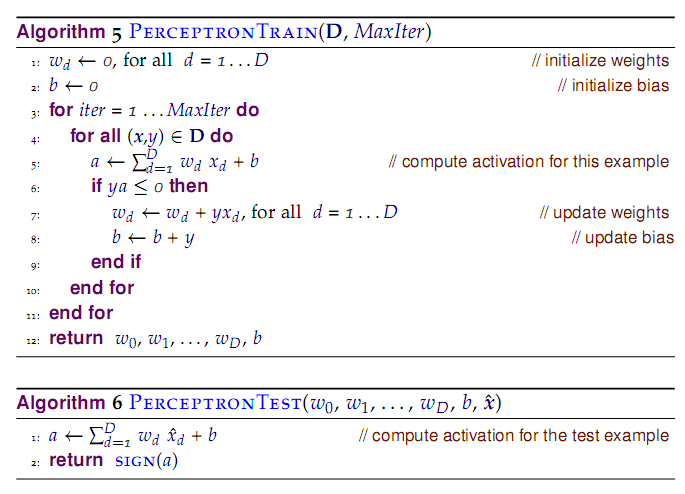

The algorithm is shown in the above image.

In [10]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [11]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

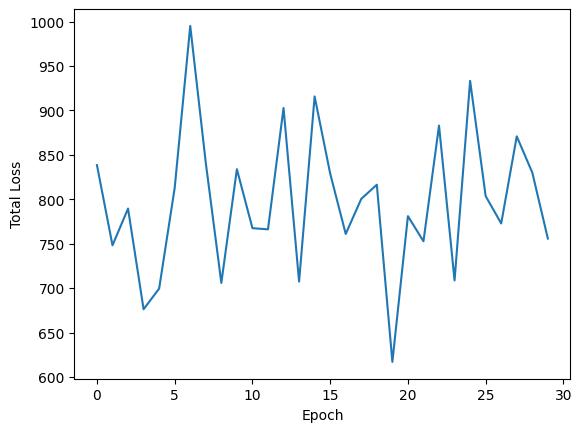

In [12]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

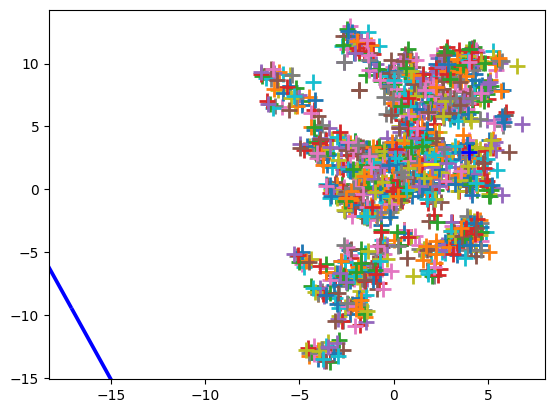

In [13]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



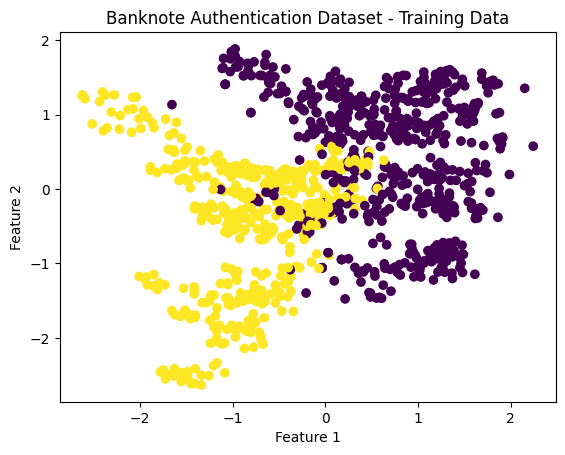

Accuracy on the test set: 46.18%


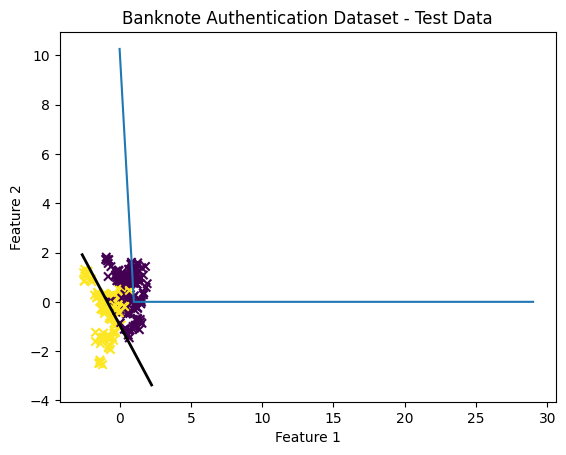

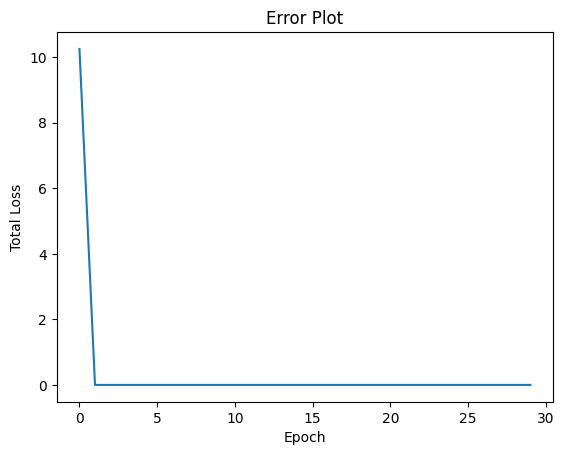

In [14]:
#Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

# Load Banknote Authentication dataset (replace 'banknote-authentication.csv' with the actual file name)
data = pd.read_csv('banknote-authentication.csv')

# Assuming the target variable is in the column named 'class' (replace with the actual column name)
X = data.drop('class', axis=1).values  # Features
y = data['class'].values  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Plot the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Banknote Authentication Dataset - Training Data')
plt.show()

# Train the perceptron and plot the total loss
w = perceptron_algo_plot(X_train, y_train)

# Plot the decision boundary
plt.plot([np.min(X_train[:, 0]), np.max(X_train[:, 0])], [-(w[0] + w[1]*np.min(X_train[:, 0]))/w[2], -(w[0] + w[1]*np.max(X_train[:, 0]))/w[2]], 'k-', lw=2)

# Add test samples
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Banknote Authentication Dataset - Test Data')

# Evaluate accuracy on the test set
y_pred = np.sign(np.dot(X_test, w))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

# Show the error plot
plt.figure()
perceptron_algo_plot(X_train, y_train)
plt.title('Error Plot')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.show()




<ipython-input-16-101ca75bfb60>:50: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(learning_rates), learning_rates.index(eta) + 1)


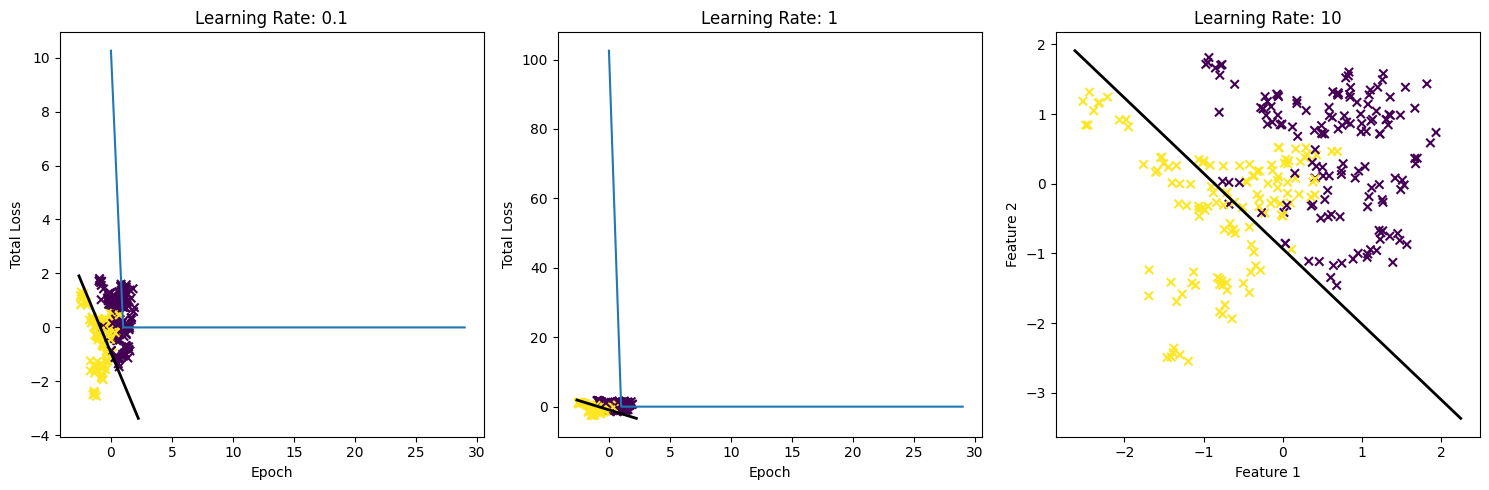

In [16]:
#Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
# Experiment with different learning rates
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

# Perceptron algorithm using our update rule
def perceptron_algo(X, Y, eta=1):
    w = np.zeros(len(X[0]))
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

def perceptron_algo_plot(X, Y, eta=1):
    w = np.zeros(len(X[0]))
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

# Load Banknote Authentication dataset (replace 'banknote-authentication.csv' with the actual file name)
# ... (same as previous code)

# Experiment with different learning rates
learning_rates = [0.1, 1, 10]

plt.figure(figsize=(15, 5))

for eta in learning_rates:
    w = perceptron_algo_plot(X_train, y_train, eta=eta)

    plt.subplot(1, len(learning_rates), learning_rates.index(eta) + 1)

    # Plot the decision boundary
    plt.plot([np.min(X_train[:, 0]), np.max(X_train[:, 0])], [-(w[0] + w[1]*np.min(X_train[:, 0]))/w[2], -(w[0] + w[1]*np.max(X_train[:, 0]))/w[2]], 'k-', lw=2)

    # Add test samples
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x')

    plt.title(f'Learning Rate: {eta}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()



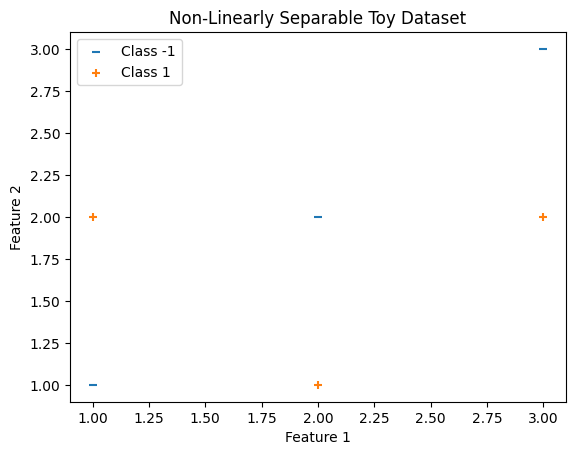

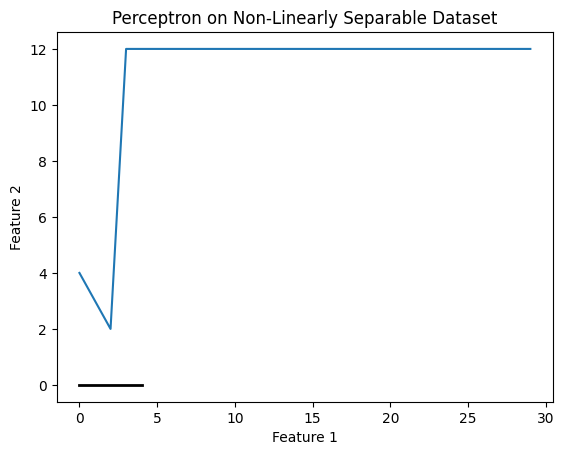

In [17]:
#Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations.
# Create a non-linearly separable toy dataset
X_non_linear = np.array([
    [1, 1, -1],
    [2, 2, -1],
    [3, 3, -1],
    [1, 2, -1],
    [2, 1, -1],
    [3, 2, -1],
])
y_non_linear = np.array([-1, -1, -1, 1, 1, 1])

# Plot the non-linearly separable toy dataset
plt.scatter(X_non_linear[y_non_linear == -1][:, 0], X_non_linear[y_non_linear == -1][:, 1], marker='_', label='Class -1')
plt.scatter(X_non_linear[y_non_linear == 1][:, 0], X_non_linear[y_non_linear == 1][:, 1], marker='+', label='Class 1')
plt.title('Non-Linearly Separable Toy Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Run perceptron algorithm on non-linearly separable dataset
w_non_linear = perceptron_algo_plot(X_non_linear, y_non_linear)

# Plot the decision boundary
plt.plot([0, 4], [-w_non_linear[2]/w_non_linear[1], -(w_non_linear[2] + 4*w_non_linear[0])/w_non_linear[1]], 'k-', lw=2)
plt.title('Perceptron on Non-Linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


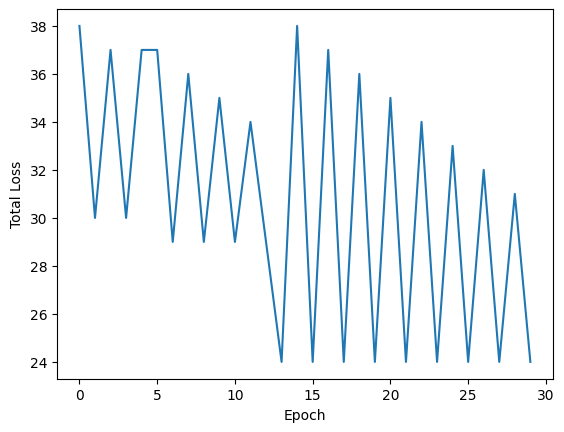

In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.